# Plotting Sigmoid Funtion

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [0]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [4]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [0]:
# This is slope of plot
w = -2 #@param {type: "slider", min: -2, max: 2, step: 0.1}
# This is x offset of plot 
b = 0.8 #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10, 10, 100)
Y = sigmoid(X, w, b) # Even though we gave only var as parameters in func def,
# If we pass a array as parameter python automatically broadcasts and 
# returns array of corresponding values

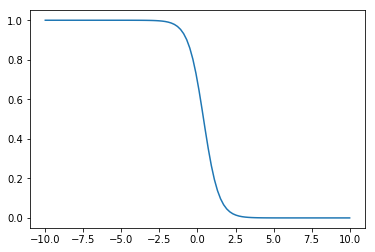

In [6]:
plt.plot(X, Y)
plt.show()

$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [8]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [0]:
 from mpl_toolkits import mplot3d

In [10]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2) # Makes a grid (2D) with the values

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

## Contour Plotting

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

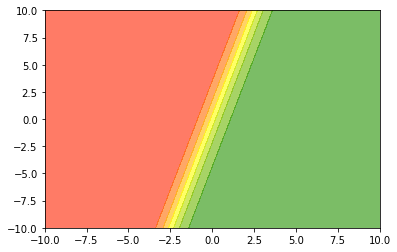

In [13]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

## Normal Plotting

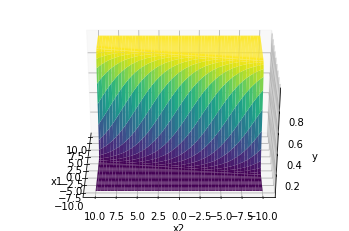

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(XX1, XX2, Y, 200, cmap='viridis') # -- for discrete points
ax.plot_surface(XX1, XX2, Y, cmap='viridis') # Plots surface -- continuous
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 180) # (height, rotation)

# Compute Loss for a Given Dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10 # random returns b/w -1 to 1. So, convert to -10 to 10
Y = sigmoid(X, w_unknown, b_unknown)

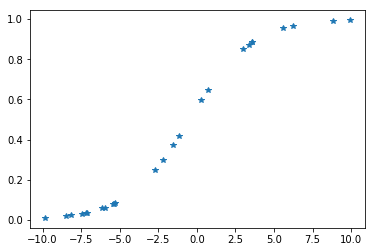

In [16]:
plt.plot(X, Y, '*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est)) ** 2
  return loss

In [0]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101) # We use 101/102 instead of 100 to get accurate results

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [19]:
WW.shape

(101, 101)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

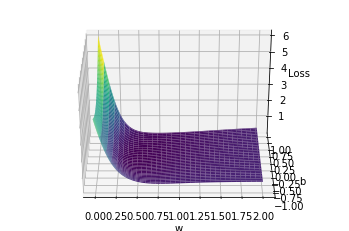

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [0]:
ij = np.argmin(Loss) # This returns a combi of i and j
i = int(np.floor(ij/Loss.shape[1])) # i is ij/no. of columns
j = int(ij - i * Loss.shape[1])

In [23]:
print(i, j)

62 25


In [24]:
print(WW[i, j], BB[i, j])

0.5 0.24


# Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):  # Simply used to get w1x1 + w2x2 + ... + b
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)
        
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
        
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Fit for Toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [27]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1], c=Y, cmap=my_cmap)
  ax.plot()


[[-1.22841472  0.93574267]] [0.00375775]



[[-1.00027255  1.10287826]] [0.04599693]



[[-0.83669108  1.2012619 ]] [0.08912604]



[[-0.72329329  1.2353614 ]] [0.11162224]



[[-0.61774105  1.23870571]] [0.12531737]



[[-0.49892471  1.21978759]] [0.13518726]



[[-0.34342512  1.17620133]] [0.14415573]



[[-0.10442603  1.09384417]] [0.1560763]



[[0.31805709 0.93568762]] [0.17607057]



[[0.72518592 0.72078556]] [0.16317422]



[[0.85020625 0.47687486]] [0.18472204]



[[0.94130623 0.1001544 ]] [0.2349162]



[[ 0.94387999 -0.29245633]] [0.20607253]



[[ 1.00786026 -0.37019469]] [0.1214405]



[[ 1.09590768 -0.3442105 ]] [0.04931354]



[[ 1.14440475 -0.40699632]] [-0.01720642]



[[ 1.21315997 -0.3900529 ]] [-0.07442858]



[[ 1.25543923 -0.43191402]] [-0.12733059]



[[ 1.30781792 -0.43001084]] [-0.17379382]



[[ 1.34718342 -0.45303143]] [-0.21661983]



[[ 1.38812568 -0.46094587]] [-0.25521479]



[[ 1.42392335 -0.47444206]] [-0.29075017]



[[ 1.45810188 -0.48461833]] [-0.32336617]



[[ 1.4897942  -0.49491011]] [-0.35353306]



[[ 1.51961434 -0.50437205]] [-0.38151677]



[[ 1.54768711 -0.51332578]] [-0.40758023]



[[ 1.57421171 -0.52178013]] [-0.4319373]



[[ 1.59934146 -0.52979145]] [-0.45477224]



[[ 1.62321078 -0.53740176]] [-0.47624295]



[[ 1.64593593 -0.54464808]] [-0.49648565]


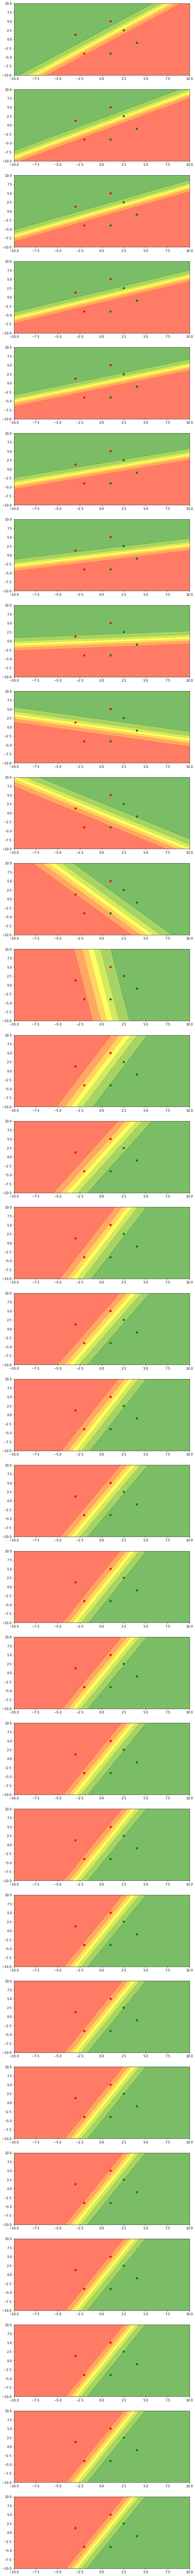

In [29]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

# Load Data

In [30]:
!wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

--2019-05-06 08:18:34--  https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/739uo8ebwbic9kb/mobile_cleaned.csv [following]
--2019-05-06 08:18:34--  https://www.dropbox.com/s/raw/739uo8ebwbic9kb/mobile_cleaned.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7906d3fa26e55a8f1e8e33b595.dl.dropboxusercontent.com/cd/0/inline/AgVUVtQIdfM_ZGYtGew_pnJNyQERhUZ6gDx4zGvwKTGOFA9C2BlXND1uo_kvgSf_zbofgwfkXHshjuOfJrX2FlimzQcCVEzB9_YUwlB4HwU_gA/file# [following]
--2019-05-06 08:18:34--  https://uc7906d3fa26e55a8f1e8e33b595.dl.dropboxusercontent.com/cd/0/inline/AgVUVtQIdfM_ZGYtGew_pnJNyQERhUZ6gDx4zGvwKTGOFA9C2BlXND1uo_kvgSf_zbofgwfkXHshjuOfJrX2FlimzQcCVEzB9_YUwlB4HwU_gA/file
R

In [31]:
!ls

mobile_cleaned.csv  sample_data


In [0]:
data = pd.read_csv('mobile_cleaned.csv')

In [33]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [34]:
data.shape

(341, 88)

In [0]:
X = data.drop('Rating', axis=1)

In [0]:
Y = data['Rating'].values

In [37]:
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,0,1,0,0,0,1


In [38]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [40]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised = data['Class'].values

## Standardisation

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
R = np.random.random([100, 1])

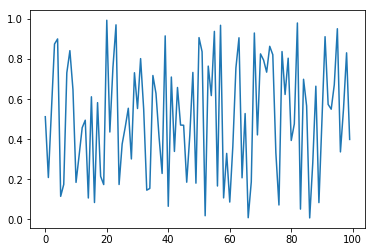

In [44]:
plt.plot(R)
plt.show()

In [45]:
np.mean(R)

0.5111812665446995

In [46]:
np.std(R)

0.28749544031775687

In [0]:
scaler = StandardScaler()

In [48]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
scaler.mean_

array([0.51118127])

In [0]:
RT = scaler.transform(R)

In [51]:
np.mean(RT)

4.884981308350689e-17

In [52]:
np.std(RT)

1.0

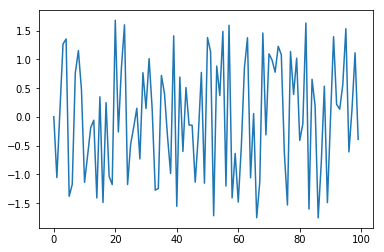

In [53]:
plt.plot(RT)
plt.show()

In [72]:
print(type(X))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarised)

<class 'pandas.core.frame.DataFrame'>


In [55]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [0]:
scaler = StandardScaler()

In [57]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [0]:
minmax_scaler = MinMaxScaler()

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

In [60]:
np.min(Y_scaled_train)

0.0

In [0]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [0]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(-1, 1)))[0][0]

In [63]:
scaled_threshold

0.6800000000000002

In [0]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype('int').ravel()

In [0]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype('int').ravel()

# Train on Real Data

In [0]:
sn = SigmoidNeuron()

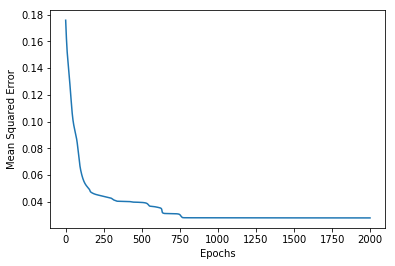

In [67]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.015, display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype('int').ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype('int').ravel()

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [71]:
print(accuracy_train, accuracy_test)

0.8117647058823529 0.7674418604651163
